In [3]:
#this helps to automatically label my images based on floder name

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.optimizers import RMSprop
import numpy as np


In [5]:
img=image.load_img("training/not_happy/3.jpg")

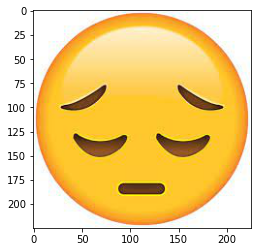

In [6]:
plt.imshow(img)

In [7]:
cv2.imread("training/not_happy/3.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [9]:
cv2.imread("training/not_happy/3.jpg").shape
#255 is height and 225 width 3 is RGB

(225, 225, 3)

## rgb ranges fromm 0-255 and i want this ranges from 0 to 1 divide each elemt of matrix by 255


In [10]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


## lets convert taining images to a dataset 

In [20]:
train_dataset=train.flow_from_directory('training/',
                                        target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('validation/',
                                        target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 19 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [21]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        ##
                                        tf.keras.layers.Flatten(),
                                        ##
                                         tf.keras.layers.Dense(512,activation='relu'),
                                         ##
                                         tf.keras.layers.Dense(1,activation='sigmoid')

])

In [27]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [29]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 3.6265 - accuracy: 0.4444 - val_loss: 0.9229 - val_accuracy: 0.5263
Epoch 2/10
3/3 [==============================] - 1s 469ms/step - loss: 0.8306 - accuracy: 0.4444 - val_loss: 0.7006 - val_accuracy: 0.5789
Epoch 3/10
3/3 [==============================] - 1s 467ms/step - loss: 0.7861 - accuracy: 0.5556 - val_loss: 0.5664 - val_accuracy: 0.6316
Epoch 4/10
3/3 [==============================] - 1s 406ms/step - loss: 0.6108 - accuracy: 0.8571 - val_loss: 0.5847 - val_accuracy: 0.5789
Epoch 5/10
3/3 [==============================] - 1s 469ms/step - loss: 0.7848 - accuracy: 0.5556 - val_loss: 0.4197 - val_accuracy: 0.8947
Epoch 6/10
3/3 [==============================] - 1s 484ms/step - loss: 0.3808 - accuracy: 1.0000 - val_loss: 0.2763 - val_accuracy: 0.9474
Epoch 7/10
3/3 [==============================] - 2s 699ms/step - loss: 0.4504 - accuracy: 0.7143 - val_loss: 0.2371 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=======

In [31]:
dir_path='testing'
for i in os.listdir(dir_path):
    print(i)

2.jpg
3.jpg
4.jpg
5.jpg
7.jpg
8.jpg


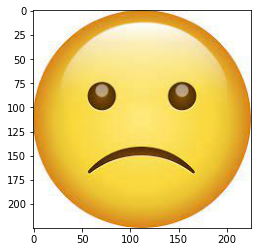

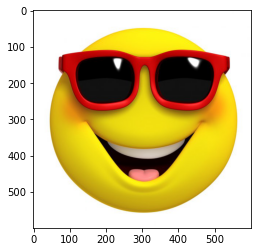

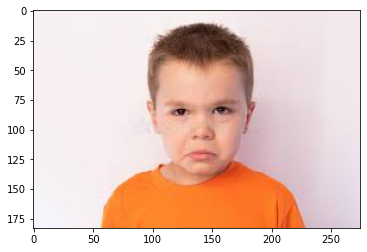

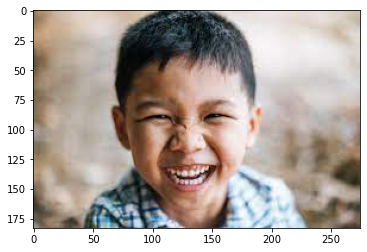

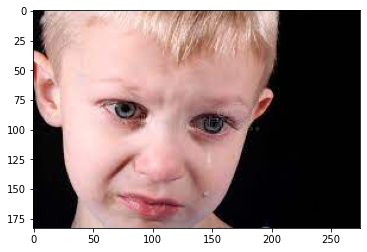

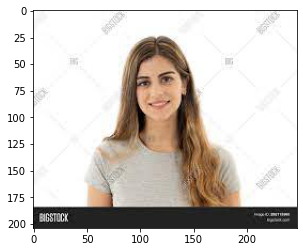

In [33]:
dir_path='testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i)
    plt.imshow(img)
    plt.show()

In [34]:
validation_dataset.class_indices

{'happy': 0, 'not_happy': 1}

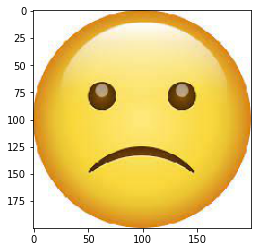

not happy face image


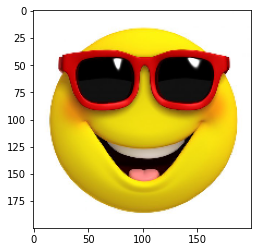

happy face image


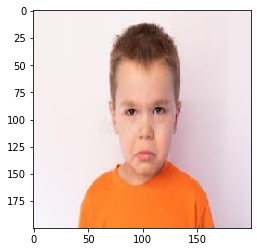

not happy face image


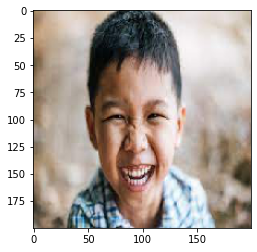

happy face image


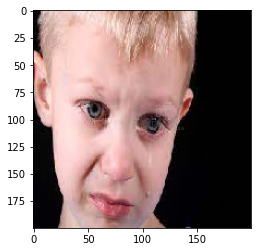

not happy face image


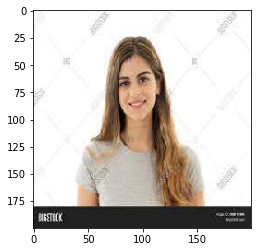

happy face image


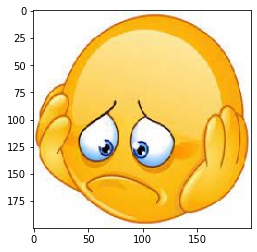

not happy face image


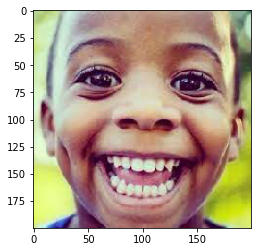

not happy face image


In [36]:
dir_path='testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("happy face image")
    else:
        print("not happy face image")
        